# Task 1: Extend the face detection example to face and eye detection

## The Setting

Let's look at the helper functions we had built for Face Detection:

In [32]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)
from copy import deepcopy

def plotBGR2RGB(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    return(1)

# Given an image matrix, detects a face, draws a rectangle around it, and returns it
def face_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
    rects = detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    return(image)

# Given path to an image, executes the face detection pipeline and plots resulting images
def face_plot(imgpath):
    image_p = cv2.imread(imgpath)
    image_f = deepcopy(image_p)
    image_f = face_detector(image_f)
    res = np.hstack((image_p, image_f))
    plt.figure(figsize=(20,10))
    plotBGR2RGB(res)
    return(image_f)

OpenCV Version : 3.1.0 


## The Task

Create a new function called `faceeye_detector()` to replace the function `face_detector()`. The new function `faceeye_detector()` identifies eyes in addition to the face, and draws rectangles around eyes as well.

* It should take an image (numpy array) as input
* The output should be an image (numpy array) which is the same as input image, but now with rectangles drawn around any faces and eyes present in the image

Hint:
* https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/
* http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

## The Solution

In [33]:
def faceeye_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    path_to_hc = "/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/"
    
    face_cascade = cv2.CascadeClassifier(path_to_hc + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(path_to_hc + 'haarcascade_eye.xml')
    
    rects_face = face_cascade.detectMultiScale(gray, scaleFactor=1.05, 
                                               minNeighbors=7, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in rects_face:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]
    
    rects_eye = eye_cascade.detectMultiScale(roi_gray)
    #for (x, y, w, h) in rects_eye:
    #    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    for (ex,ey,ew,eh) in rects_eye:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
    
    return(image)

# change face_detector to faceeye_detector
def face_plot(imgpath):
    image_p = cv2.imread(imgpath)
    image_f = deepcopy(image_p)
    image_f = faceeye_detector(image_f)
    res = np.hstack((image_p, image_f))
    plt.figure(figsize=(20,10))
    plotBGR2RGB(res)
    return(image_f)

### Examples

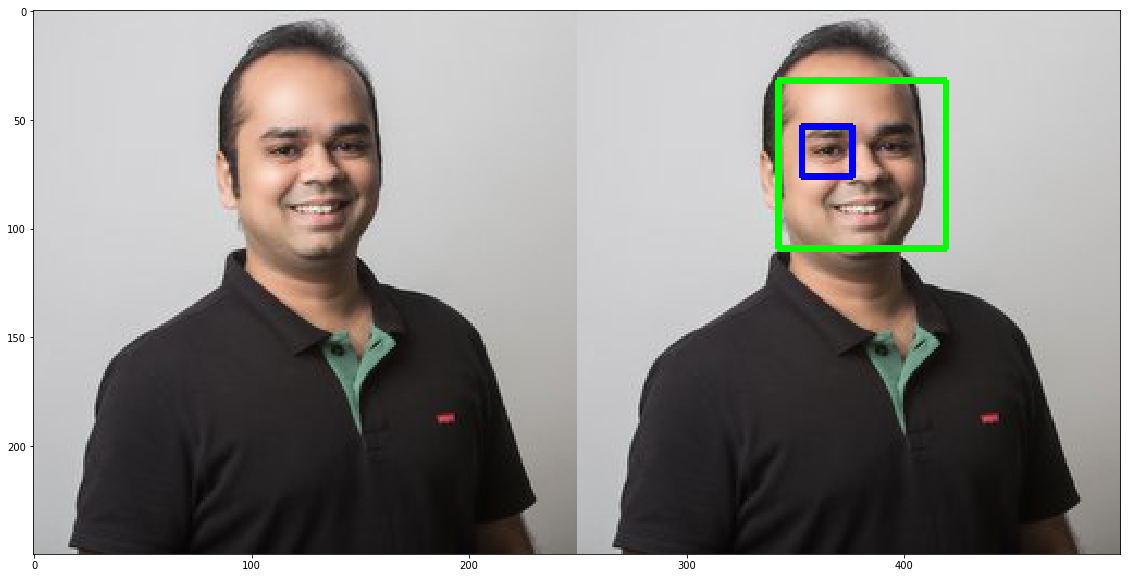

array([[[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       ..., 
       [[180, 178, 177],
        [180, 178, 177],
        [180, 178, 177],
        ..., 
        [115, 120, 123],
        [115, 120, 123],
        [115, 120, 123]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 121],
        [113, 118, 121]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 121],
        [113, 118,

In [34]:
face_plot("./images/face01.jpg")

In [31]:
face_plot("./images/face02.jpg")

UnboundLocalError: local variable 'roi_gray' referenced before assignment

We got an error as no faces were detected.

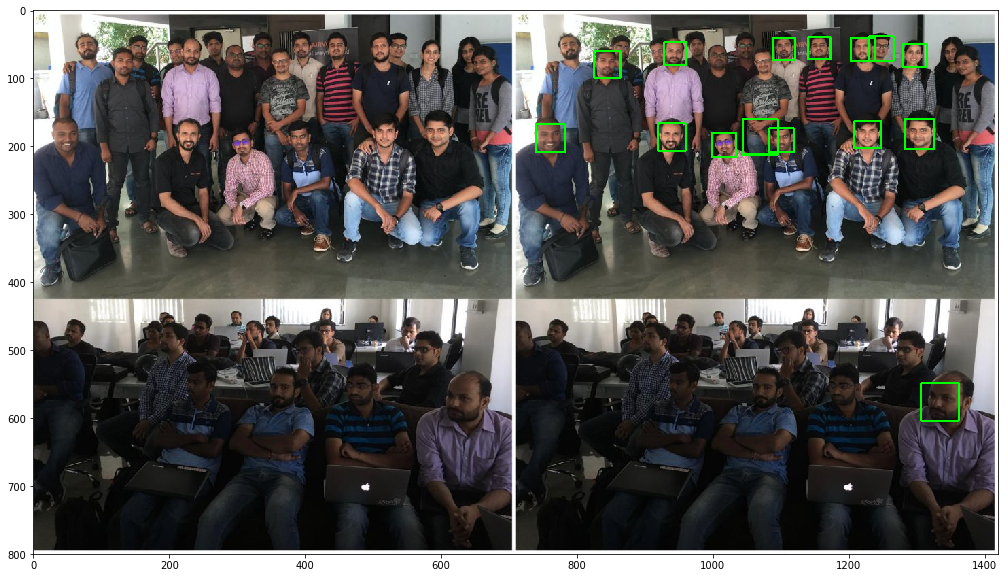

In [30]:
face_plot("./images/face03.jpeg")

## Validating Student's Code

The output of `faceeye_detector()` or `face_plot()` (both are the for a given image), which is a numpy array, should match up the numpy array from the official solution:

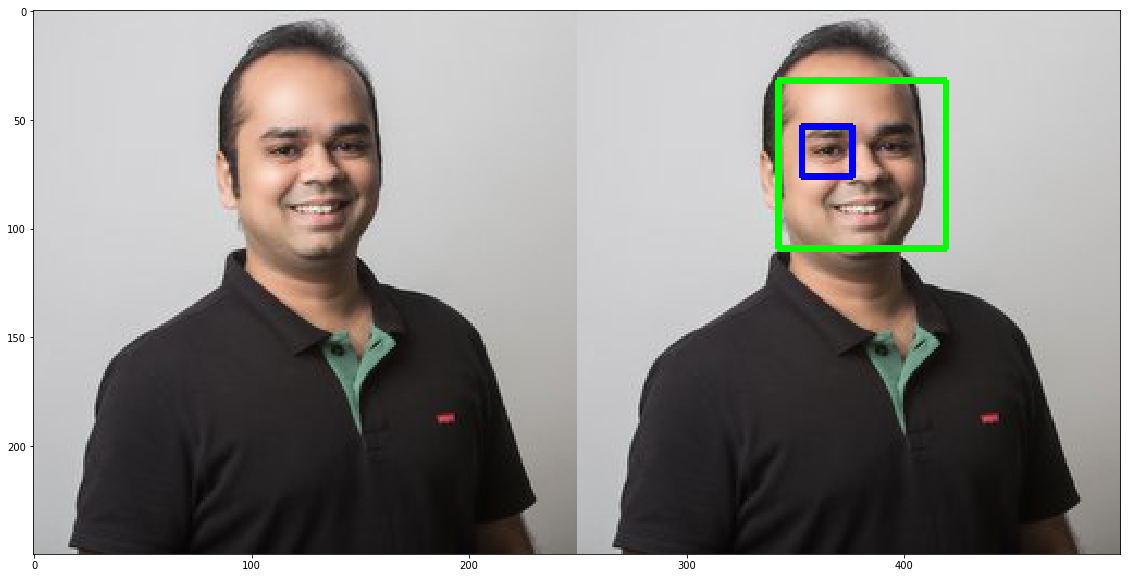

In [36]:
x = face_plot("./images/face01.jpg")

In [37]:
x

array([[[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       ..., 
       [[180, 178, 177],
        [180, 178, 177],
        [180, 178, 177],
        ..., 
        [115, 120, 123],
        [115, 120, 123],
        [115, 120, 123]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 121],
        [113, 118, 121]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 121],
        [113, 118,

The output from student's function for the image given above should match the value of `x`.

---

# Task 2: Getting better at digits (MNIST)

## The Setting

Let us put together the code we had used in the class for image classification using digits.

In [45]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier
classifier = LogisticRegression()

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Accuracy: 0.916573971079



The accuracy using Logistic Regression is 91.7%.

## The Task

Write a function called `digits()` which 

* accepts the parameters `X_train_digits` and `y_train_digits` datasets (available in your environment) for training, and 
* returns the trained model as output

## Note for implementation

* We'll create `X_train_digits`, `y_train_digits`, `X_test` and `y_test`
* `X_train_digits` and `y_train_digits` will be available in student's environment
* `X_test` and `y_test` will be available to us to evaluate the output from student's function

Get `digits` data:

In [47]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Get training dataset:

In [ ]:
X_train_digits = data[:n_samples // 2]
y_train_digits = digits.target[:n_samples // 2]

Get validation dataset:

In [ ]:
X_test = data[n_samples // 2:]
y_test = digits.target[n_samples // 2:]

## Validating Student's Solution

Let's store the output from student's function in a variable called `clf`. This will be our model, to be used for prediction.

Let's calculate `predicted`:

In [ ]:
predicted = clf.predict(X_test)

Let's calculate our validation metric:

In [ ]:
metrics.accuracy_score(y_test, predicted)

This validation metric should be more than 96% for the student to pass this Task!

## The Solution

(not in a function form)

In [46]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Accuracy: %s\n" % (metrics.accuracy_score(expected, predicted)))

Accuracy: 0.968854282536

